In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import numpy as np
sns.set()

In [44]:
data_raw = pd.read_csv('crime_data.csv')
data_raw = data_raw.rename(columns = {'Unnamed: 0' : 'State'})

In [45]:
data = data_raw.drop('State', axis = 1)
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [47]:
x_scaled = scale(data)

### KMeans

In [48]:
cl_num = 30
wcss = []
for i in range(1, cl_num):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[200.0,
 104.96163315756873,
 80.08569526137276,
 57.55425863091106,
 50.05119672966492,
 44.880410282248825,
 39.534860501085774,
 35.42859351833486,
 32.28143232141557,
 28.16297749997096,
 25.661769460520592,
 23.25473826281692,
 20.37780105919828,
 20.369673238769202,
 18.659123394560275,
 16.880843723428086,
 16.187899461580834,
 14.265987327113281,
 14.1616179851791,
 12.721715163270309,
 11.93601807436303,
 11.179187702637739,
 10.261280516701126,
 9.54017664613525,
 8.96488864393104,
 8.234761132525556,
 7.463439940642248,
 7.2655208314265485,
 6.586267487628941]

Text(0, 0.5, 'Within-cluster Sum of Squares')

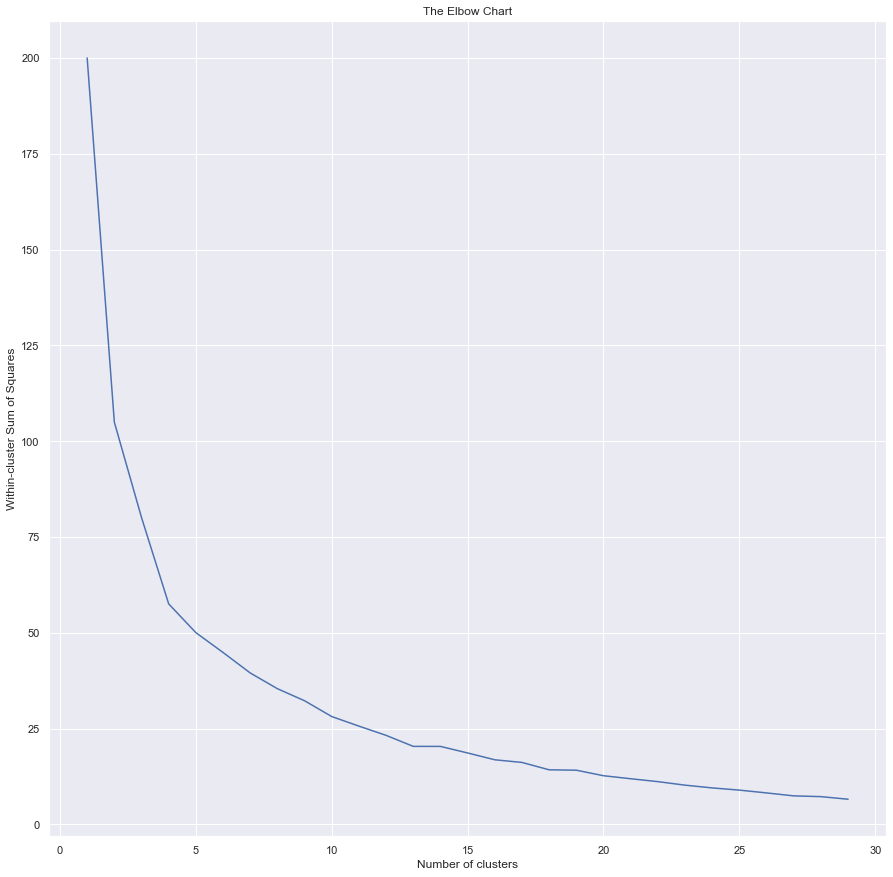

In [49]:
num_clust = range(1, cl_num)
fig =plt.subplots(figsize=(15,15))
plt.plot(num_clust, wcss)
plt.title('The Elbow Chart')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [50]:
kmeans = KMeans(4)
kmeans.fit(x_scaled)

KMeans(n_clusters=4)

In [51]:
clusters = data.copy()
clusters['clusters'] = kmeans.fit_predict(x_scaled)
clusters

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,3


In [52]:
np.unique(clusters['clusters'], return_counts = True)

(array([0, 1, 2, 3]), array([13, 13, 16,  8], dtype=int64))

['Murder', 'Assault']


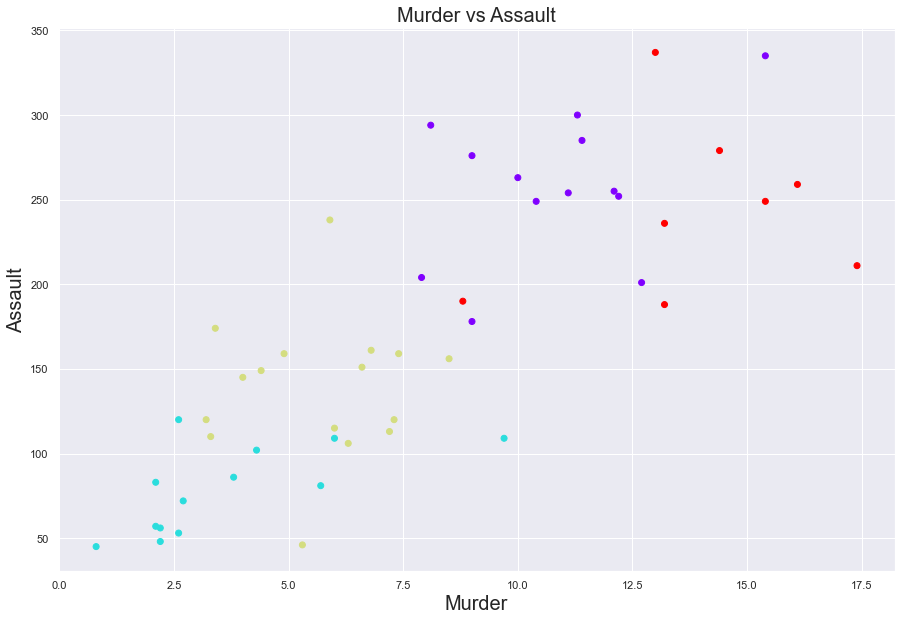

['Murder', 'UrbanPop']


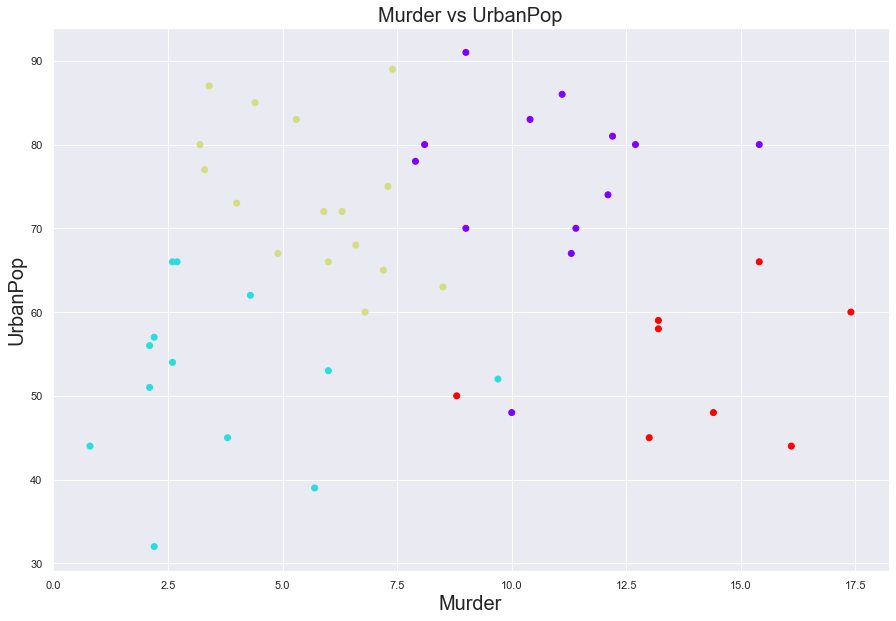

['Murder', 'Rape']


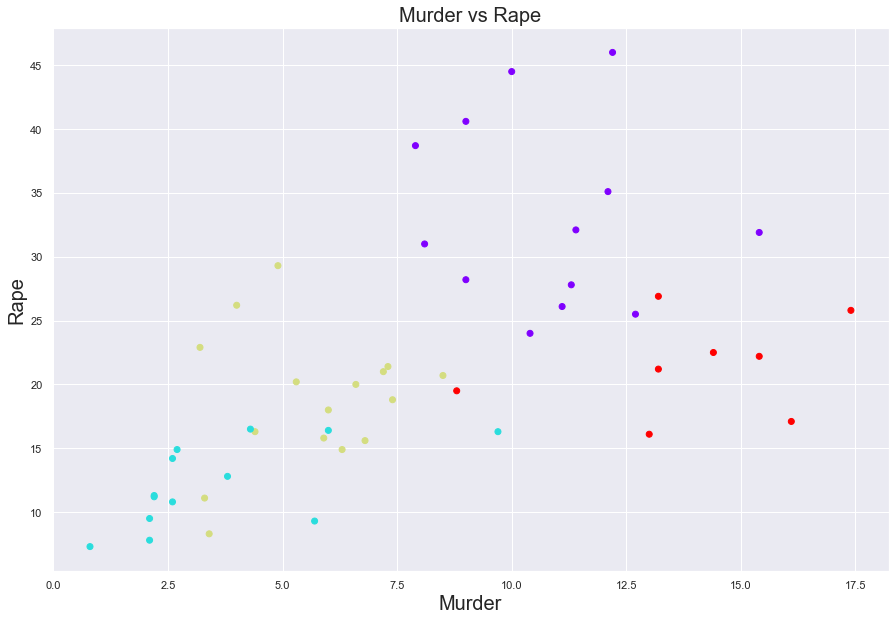

['Assault', 'UrbanPop']


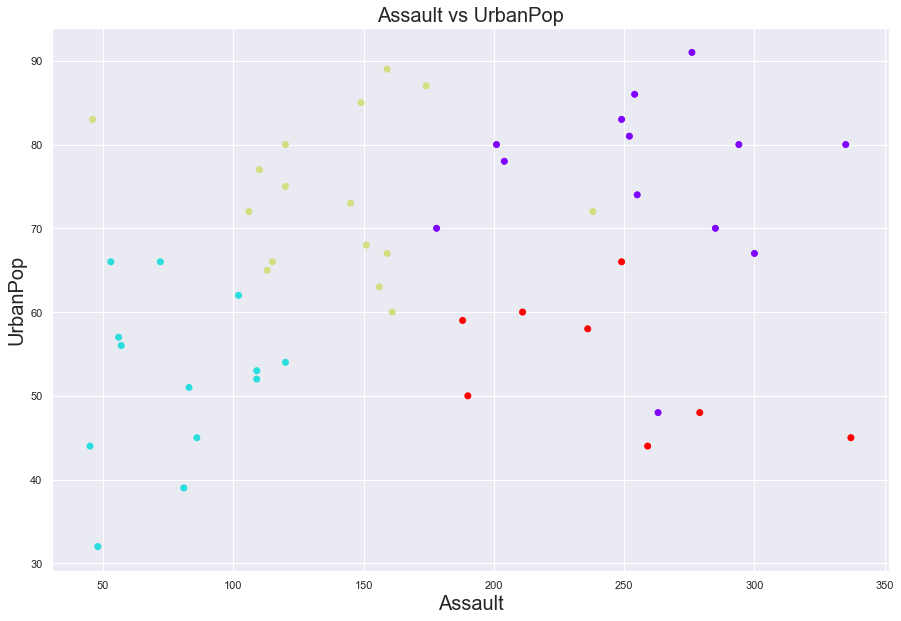

['Assault', 'Rape']


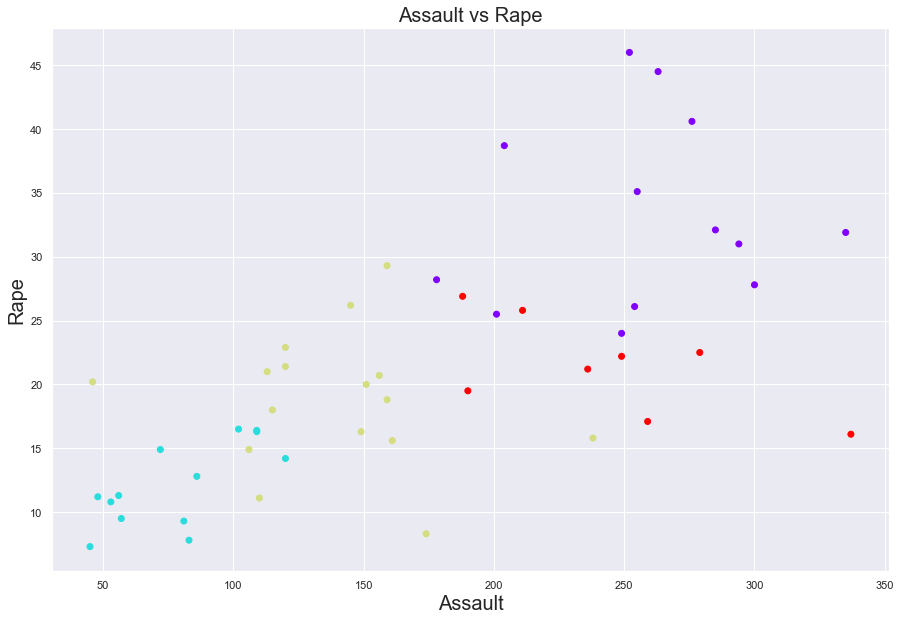

['UrbanPop', 'Rape']


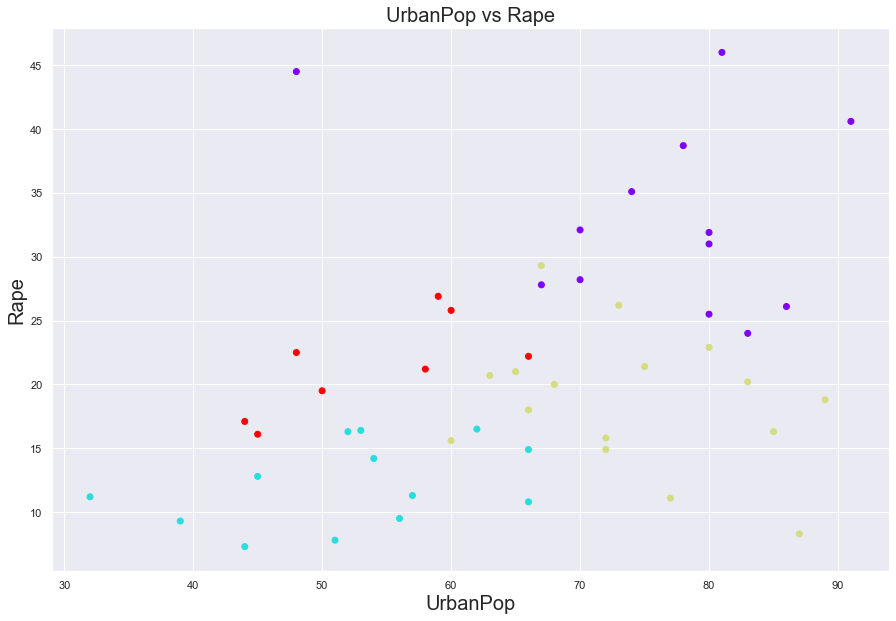

In [53]:
for i in itertools.combinations(clusters.columns[:-1],2):
    comb = list(i)
    print(comb)
    fig = plt.subplots(figsize = (15,10))
    plt.scatter(clusters[comb[0]], clusters[comb[1]], c= clusters['clusters'], cmap = 'rainbow')
    plt.xlabel(comb[0], fontsize = 20)
    plt.ylabel(comb[1], fontsize = 20)
    plt.title(comb[0] + ' ' + 'vs' + ' ' + comb[1], fontsize = 20)
    plt.show()

### Hierarchical Clustering

In [54]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

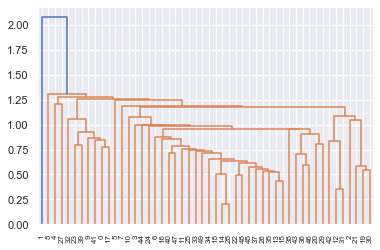

In [55]:
dendogram = sch.dendrogram(sch.linkage(x_scaled, method = 'single'))

In [56]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')

In [57]:
y_hc = hc.fit_predict(x_scaled)

In [58]:
np.unique(y_hc, return_counts = True)

(array([0, 1, 2, 3], dtype=int64), array([19, 12, 12,  7], dtype=int64))

['Murder', 'Assault']


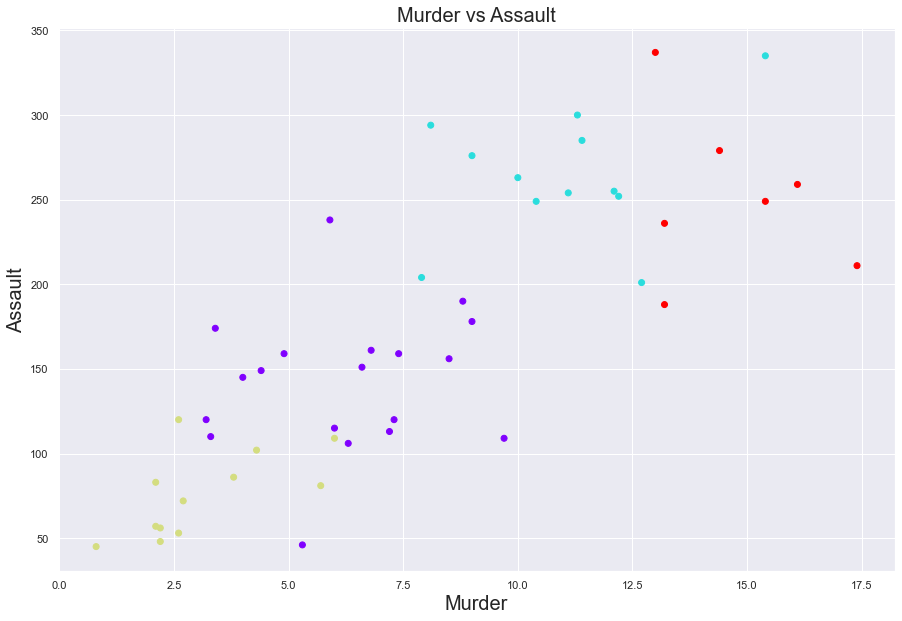

['Murder', 'UrbanPop']


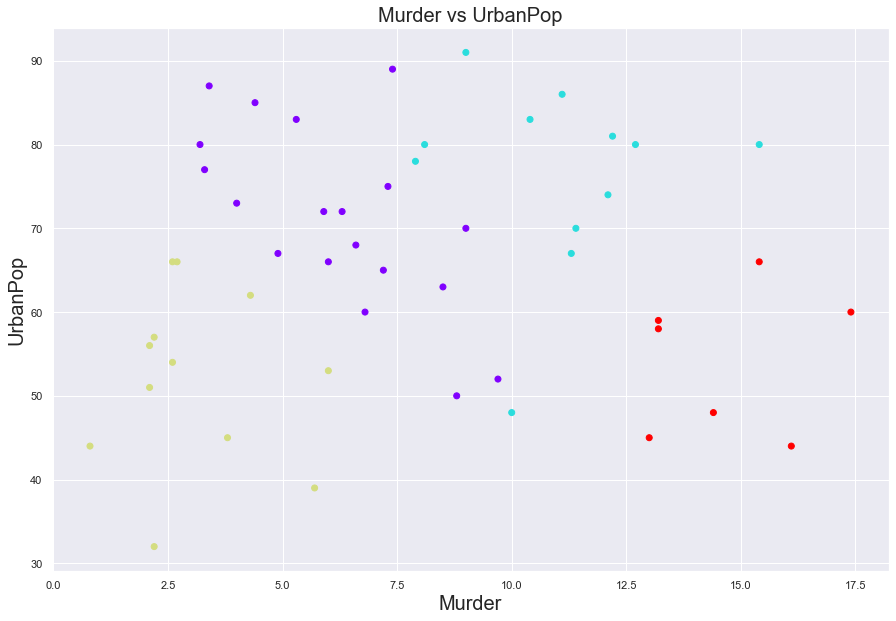

['Murder', 'Rape']


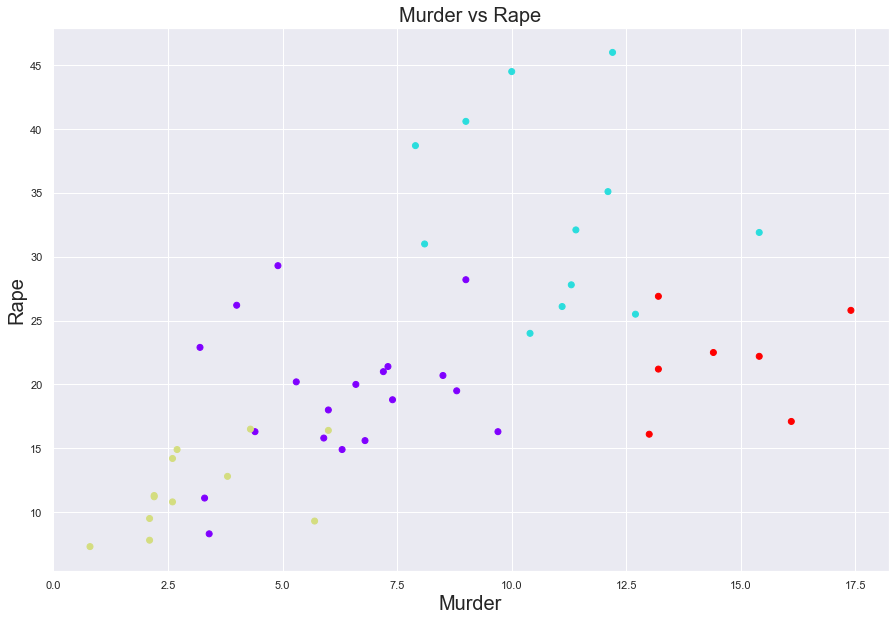

['Assault', 'UrbanPop']


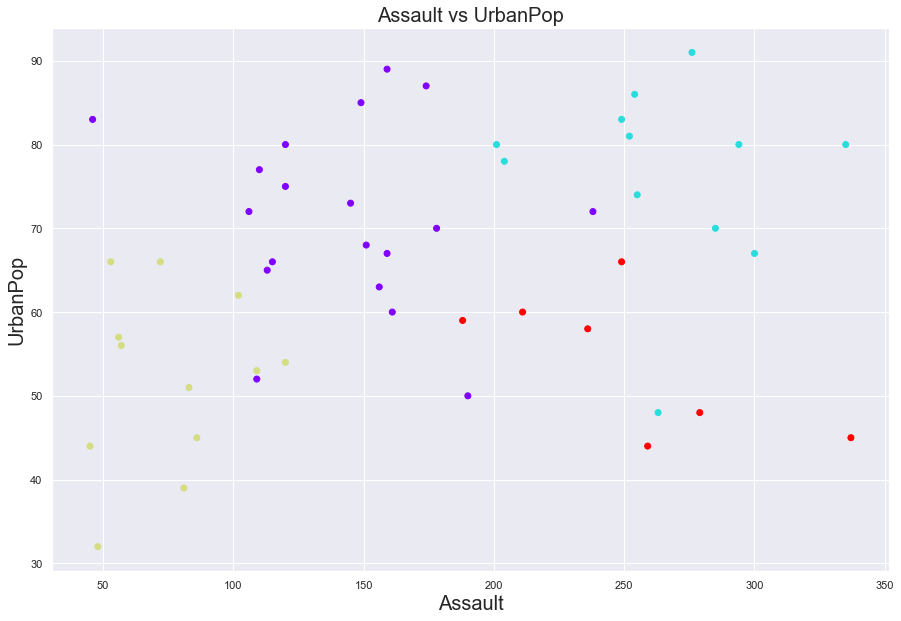

['Assault', 'Rape']


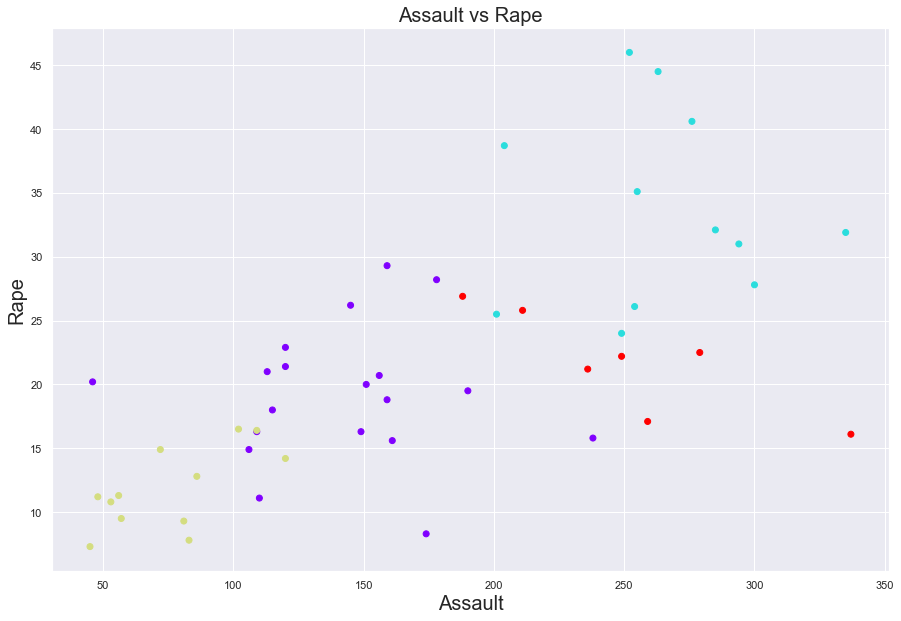

['UrbanPop', 'Rape']


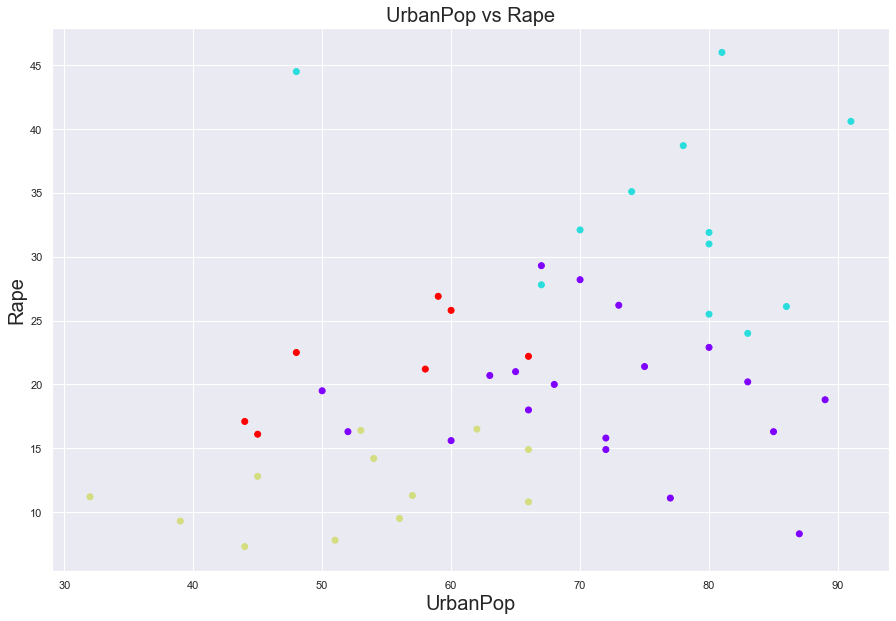

In [59]:
for i in itertools.combinations(clusters.columns[:-1],2):
    comb = list(i)
    print(comb)
    fig = plt.subplots(figsize = (15,10))
    plt.scatter(clusters[comb[0]], clusters[comb[1]], c= y_hc, cmap = 'rainbow')
    plt.xlabel(comb[0], fontsize = 20)
    plt.ylabel(comb[1], fontsize = 20)
    plt.title(comb[0] + ' ' + 'vs' + ' ' + comb[1], fontsize = 20)
    plt.show()



### DBSCAN Clustering

In [62]:
from sklearn.cluster import DBSCAN

In [63]:
dbscan = DBSCAN(eps = 0.8, min_samples = 4)
dbscan.fit(x_scaled)

DBSCAN(eps=0.8, min_samples=4)

In [64]:
clusters_db = dbscan.fit_predict(x_scaled)

In [65]:
clusters_db_df = clusters.copy()
clusters_db_df['clusters'] = clusters_db

In [66]:
np.unique(clusters_db_df['clusters'], return_counts = True)

(array([-1,  0], dtype=int64), array([33, 17], dtype=int64))

['Murder', 'Assault']


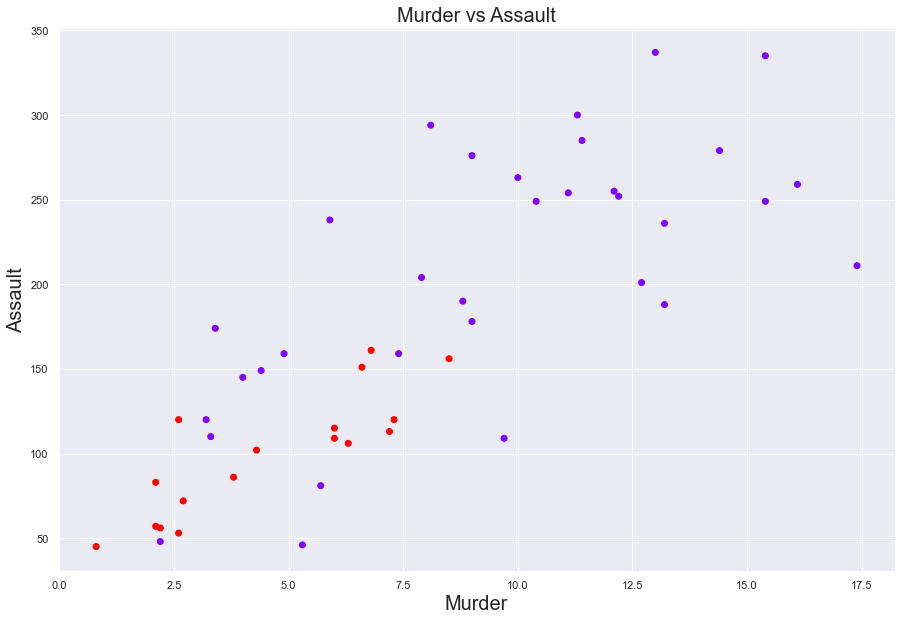

['Murder', 'UrbanPop']


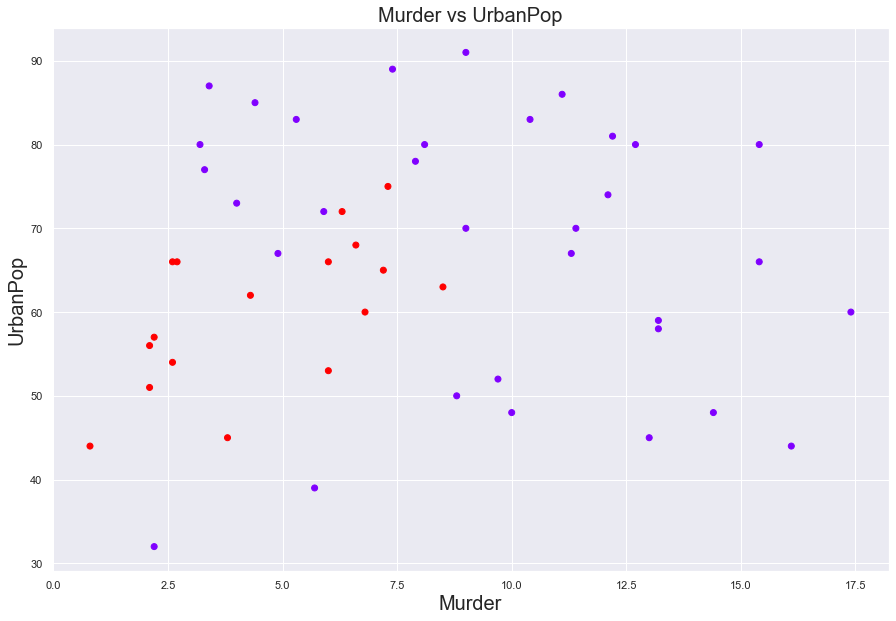

['Murder', 'Rape']


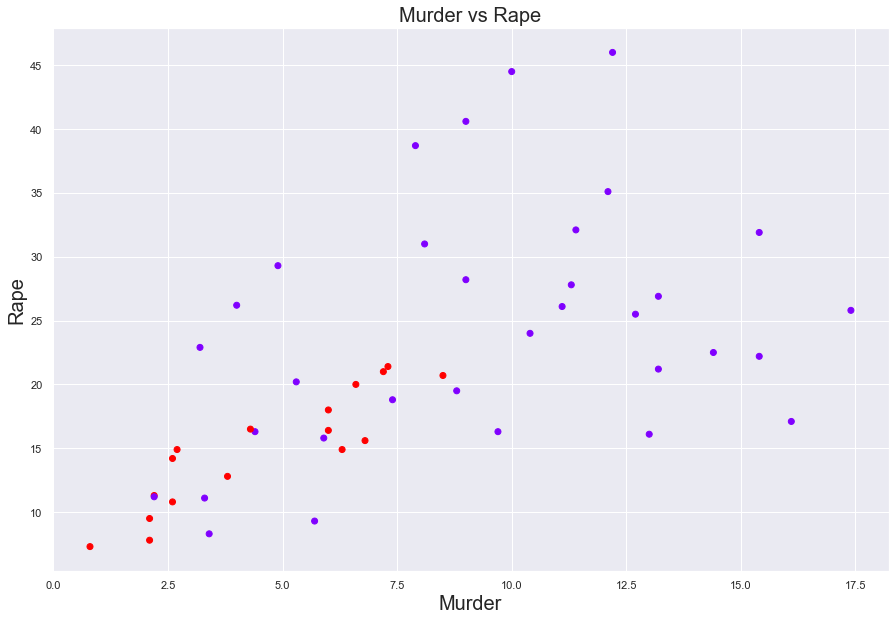

['Assault', 'UrbanPop']


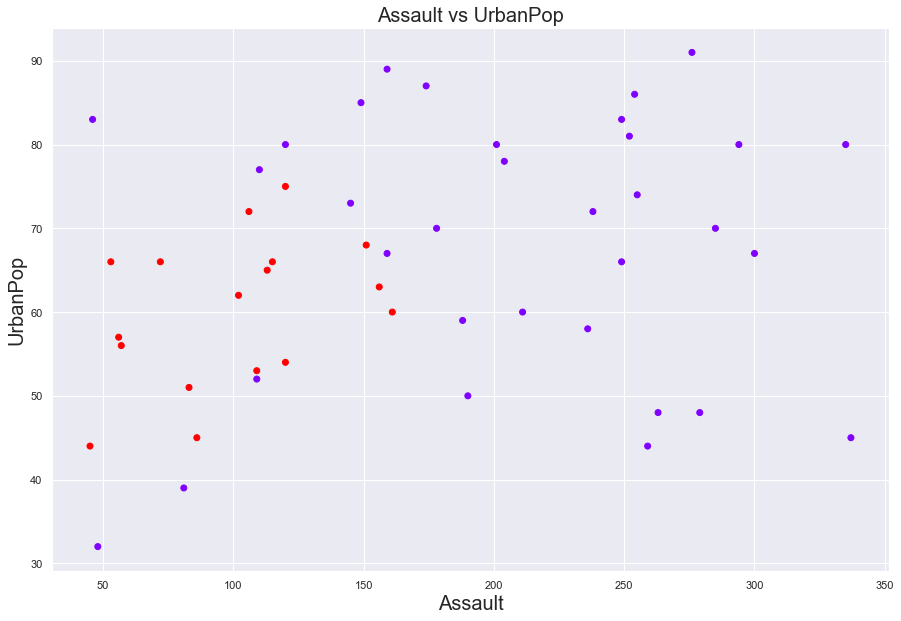

['Assault', 'Rape']


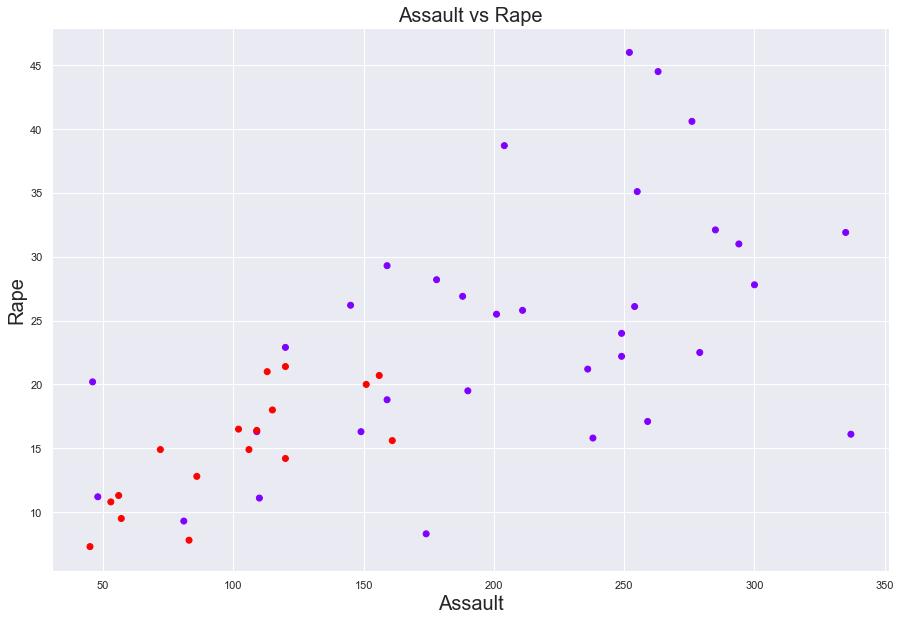

['UrbanPop', 'Rape']


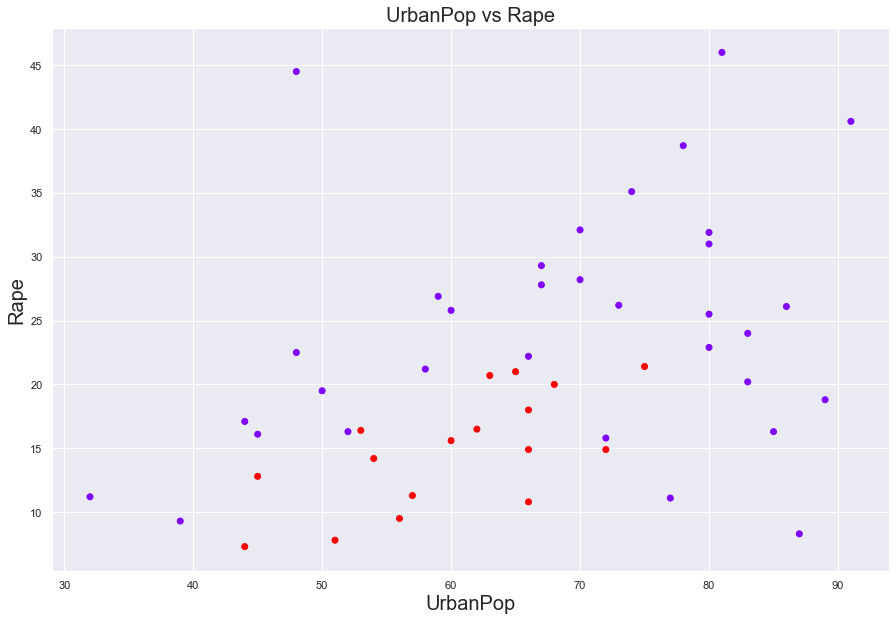

In [67]:
for i in itertools.combinations(clusters_db_df.columns[:-1],2):
    comb = list(i)
    print(comb)
    fig = plt.subplots(figsize = (15,10))
    plt.scatter(clusters_db_df[comb[0]], clusters_db_df[comb[1]], c= clusters_db_df['clusters'], cmap = 'rainbow')
    plt.xlabel(comb[0], fontsize = 20)
    plt.ylabel(comb[1], fontsize = 20)
    plt.title(comb[0] + ' ' + 'vs' + ' ' + comb[1], fontsize = 20)
    plt.show()